In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas

%matplotlib notebook

520 major river basins were downloaded from the [GRDC](https://www.bafg.de/GRDC/EN/02_srvcs/22_gslrs/221_MRB/riverbasins_node.html), version 2020. 

In [2]:
basins=geopandas.read_file("../datasets/basins/mrb_basins.shp")
basins.crs = 'epsg:4326'
basins

,RIVER_BASI,CONTINENT,OCEAN,SEA,AREA_CALC,Shape_Leng,Shape_Area,MRBID,geometry
0,COATAN,"North America, Central America and the Caribbean",Pacific Ocean,North Pacific,681.7,1.924710,0.057103,4404,"POLYGON ((-91.94583 15.18333, -91.94826 15.182..."
1,BLANCA,South America,---,---,850.7,1.571961,0.072181,3901,"POLYGON ((-69.68750 -17.46250, -69.68693 -17.4..."
2,BARIMA,South America,Atlantic Ocean,North Atlantic,904.5,1.942087,0.073963,3206,"POLYGON ((-59.85417 8.20833, -59.85351 8.22296..."
3,JURADO,South America,Pacific Ocean,North Pacific,921.7,1.539112,0.075152,3413,"POLYGON ((-77.71667 7.42917, -77.71224 7.42803..."
4,LAGUNA MUCAR,South America,---,---,931.6,1.620235,0.082147,3906,"POLYGON ((-67.08750 -23.66250, -67.08827 -23.6..."
...,...,...,...,...,...,...,...,...,...
515,OB,Asia,Arctic Ocean,Kara Sea,3040606.1,168.355250,448.342075,2108,"POLYGON ((91.75000 57.70417, 91.74542 57.70299..."
516,MISSISSIPPI,"North America, Central America and the Caribbean",Atlantic Ocean,Gulf of Mexico,3240619.0,169.753839,347.390974,4219,"POLYGON ((-89.97917 46.27083, -89.98374 46.269..."
517,NILE,Africa,Atlantic Ocean,Mediterranean Sea,3353205.7,166.624902,280.008112,1229,"MULTIPOLYGON (((30.11248 31.36109, 30.10694 31..."
518,CONGO,Africa,Atlantic Ocean,South Atlantic,3705225.9,143.361965,301.262206,1209,"MULTIPOLYGON (((33.02083 -9.67083, 33.02557 -9..."


The 520 basins do not include places without large rivers (such as Western Australia). Those basins are in another file named `additional_basins`.

In [3]:
additional_basins=geopandas.read_file("../datasets/basins/additional_basins.geojson")
indices_to_add=[12,77,95,167,171,261,163,631,392,394,476] # large arid basins to be added to the selection
add_basins=additional_basins.loc[indices_to_add]
add_basins['SUM_SUB_AR']=add_basins['SUM_SUB_AR'].astype(float) # add the basin area

In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.drop([159,22,23],inplace=True) # Antarctica, Greenland,Seven seas (tiny islands Indian ocean)

<IPython.core.display.Javascript object>


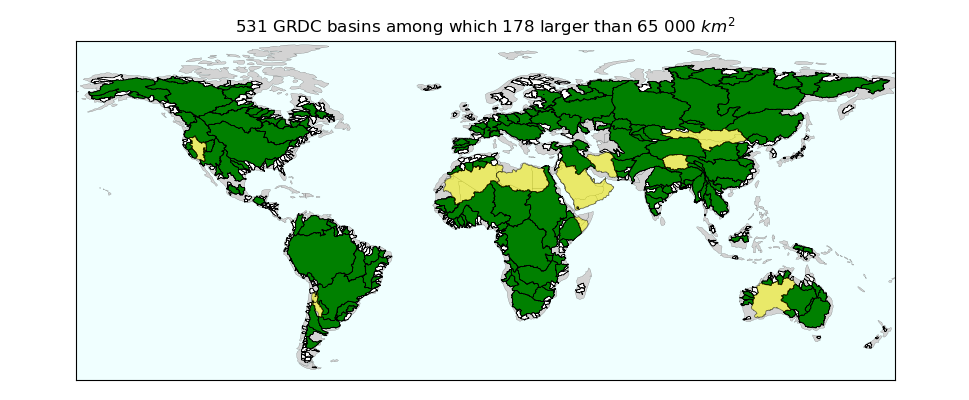

In [5]:
fig, ax = plt.subplots(figsize=(9.7,4))
ax.set_aspect('equal')
world.plot(ax=ax,color='lightgrey',edgecolor='black',linewidth=0.1)
basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
basins.loc[basins['AREA_CALC']>=6.5e4].plot(ax=ax,color='green',edgecolor='black',linewidth=0.5)
add_basins.plot(ax=ax,color='yellow',edgecolor='black',linewidth=0.5,alpha=0.5) # additional basins
ax.set_facecolor("azure")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-170,180])
ax.set_ylim([-60,85])
ax.set_title('{} GRDC basins among which {} larger than 65 000 $km^2$'.format(basins.shape[0]+add_basins.shape[0],
                                                                basins.loc[basins['AREA_CALC']>=6.5e4].shape[0]))
plt.tight_layout()
plt.show()

Select only large basins

In [6]:
large_basins=basins.loc[basins['AREA_CALC']>=6.5e4,['RIVER_BASI','CONTINENT','OCEAN','AREA_CALC','geometry']]
large_basins

,RIVER_BASI,CONTINENT,OCEAN,AREA_CALC,geometry
340,WINISK,"North America, Central America and the Caribbean",Arctic Ocean,65635.3,"POLYGON ((-87.24167 52.32500, -87.24223 52.314..."
341,COPPER,"North America, Central America and the Caribbean",Pacific Ocean,65704.3,"POLYGON ((-140.15833 61.00000, -140.15890 60.9..."
342,NOTTAWAY,"North America, Central America and the Caribbean",Arctic Ocean,66053.1,"MULTIPOLYGON (((-73.85417 50.00833, -73.85089 ..."
343,TALAS,Asia,---,66179.8,"POLYGON ((73.61250 42.33333, 73.60612 42.33277..."
345,MARONI,South America,Atlantic Ocean,66408.4,"POLYGON ((-53.08750 3.20833, -53.08508 3.20798..."
...,...,...,...,...,...
515,OB,Asia,Arctic Ocean,3040606.1,"POLYGON ((91.75000 57.70417, 91.74542 57.70299..."
516,MISSISSIPPI,"North America, Central America and the Caribbean",Atlantic Ocean,3240619.0,"POLYGON ((-89.97917 46.27083, -89.98374 46.269..."
517,NILE,Africa,Atlantic Ocean,3353205.7,"MULTIPOLYGON (((30.11248 31.36109, 30.10694 31..."
518,CONGO,Africa,Atlantic Ocean,3705225.9,"MULTIPOLYGON (((33.02083 -9.67083, 33.02557 -9..."


Format additional basins so that columns match the original table.

In [7]:
df=add_basins[['SUBREGNAME','REGNAME','OCEAN','SUM_SUB_AR','geometry']]
df.columns=['RIVER_BASI','CONTINENT','OCEAN','AREA_CALC','geometry']
df['RIVER_BASI'].replace('Iranian Plateau (ex 229, 230, 231, 234)','Iranian Plateau',inplace=True)
df['RIVER_BASI'].replace('Puna de Atacama plateau (ex 394)','Puna de Atacama plateau',inplace=True)
df

C:\Users\fafal\AppData\Roaming\Python\Python36\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,RIVER_BASI,CONTINENT,OCEAN,AREA_CALC,geometry
12,Western Sahara,Africa,---,2649482.9,"POLYGON ((7.36250 32.51667, 7.37404 32.49522, ..."
77,Eastern Sahara,Africa,---,2044770.4,"POLYGON ((29.45000 30.48750, 29.52158 30.49110..."
95,Ogaden plateau,Africa,Indian Ocean,227787.7,"POLYGON ((46.15417 3.15000, 46.11179 3.20328, ..."
167,Arabian Peninsula,Asia,Indian Ocean,2828743.3,"POLYGON ((39.25000 32.35833, 39.21723 32.26446..."
171,Iranian Plateau,Asia,---,816931.7,"POLYGON ((58.37917 36.96250, 58.44943 36.85221..."
261,"Gobi desert, Junggar and Turpan depressions",Asia,---,1426370.7,"POLYGON ((107.53333 47.64583, 107.53394 47.621..."
163,Tibetan plateau,Asia,---,590841.4,"POLYGON ((91.41667 35.80000, 91.51172 35.76596..."
631,Western Plateau,South-West Pacific,---,1998005.0,"POLYGON ((134.56667 -16.38750, 134.62917 -16.4..."
392,Puna de Atacama plateau,South America,---,101842.2,"POLYGON ((-68.88750 -26.79167, -68.83750 -26.8..."
394,Salinas Grandes,South America,---,155116.8,"POLYGON ((-66.62500 -26.12500, -66.57500 -26.1..."


Shorten basin names.

In [8]:
new_basins=large_basins.append(df).set_index(np.arange(0,large_basins.shape[0]+df.shape[0]))
new_basins.columns=['NAME','CONTINENT','OCEAN','RASTAREA','geometry']
new_basins['NAME'].replace('AMAZON (also AMAZONAS)','AMAZON',inplace=True)
new_basins['NAME'].replace('ABHE BAD (also ABHE BID HAYK)','ABHE BAD',inplace=True)
new_basins['NAME'].replace('CHUY (also SHU)','CHUY',inplace=True)
new_basins['NAME'].replace('COLORADO (also COLORADO RIVER)','COLORADO RIVER',inplace=True)
new_basins['NAME'].replace('COMOE (also KOMOE)','COMOE',inplace=True)
new_basins['NAME'].replace('DAUGAVA (also ZAPADNAYA DVINA, also ZAKHODNAYA DZVINA)','DAUGAVA',inplace=True)
new_basins['NAME'].replace('DOURO (also DUERO)','DOURO',inplace=True)
new_basins['NAME'].replace('JUBBA (also GENALE WENZ)','JUBBA',inplace=True)
new_basins['NAME'].replace('KUNENE (also CUNENE)','KUNENE',inplace=True)
new_basins['NAME'].replace('NEMAN (also NEMUNAS, also NYOMAN)','NEMAN',inplace=True)
new_basins['NAME'].replace('OKAVANGO (also CUBANGO)','OKAVANGO',inplace=True)
new_basins['NAME'].replace('RIO GRANDE (also BRAVO)','RIO GRANDE',inplace=True)
new_basins['NAME'].replace('RUVUMA (also ROVUMA)','RUVUMA',inplace=True)
new_basins['NAME'].replace('SAINT LAWRENCE (also SAINT-LAURENT)','SAINT LAWRENCE',inplace=True)
new_basins['NAME'].replace('TARIM HE (also TALIMU HE)','TARIM HE',inplace=True)
new_basins['NAME'].replace('URAL (also ORAL)','URAL',inplace=True)
new_basins['NAME'].replace('UVS NUUR (also UBSU-NUR)','UVS NUUR',inplace=True)
new_basins['NAME'].replace('ZHEM (also EMBA)','ZHEM',inplace=True)
new_basins['NAME'].replace('Great Basin except Great Salt Lake','Great Basin',inplace=True)
new_basins

,NAME,CONTINENT,OCEAN,RASTAREA,geometry
0,WINISK,"North America, Central America and the Caribbean",Arctic Ocean,65635.3,"POLYGON ((-87.24167 52.32500, -87.24223 52.314..."
1,COPPER,"North America, Central America and the Caribbean",Pacific Ocean,65704.3,"POLYGON ((-140.15833 61.00000, -140.15890 60.9..."
2,NOTTAWAY,"North America, Central America and the Caribbean",Arctic Ocean,66053.1,"MULTIPOLYGON (((-73.85417 50.00833, -73.85089 ..."
3,TALAS,Asia,---,66179.8,"POLYGON ((73.61250 42.33333, 73.60612 42.33277..."
4,MARONI,South America,Atlantic Ocean,66408.4,"POLYGON ((-53.08750 3.20833, -53.08508 3.20798..."
...,...,...,...,...,...
184,Tibetan plateau,Asia,---,590841.4,"POLYGON ((91.41667 35.80000, 91.51172 35.76596..."
185,Western Plateau,South-West Pacific,---,1998005.0,"POLYGON ((134.56667 -16.38750, 134.62917 -16.4..."
186,Puna de Atacama plateau,South America,---,101842.2,"POLYGON ((-68.88750 -26.79167, -68.83750 -26.8..."
187,Salinas Grandes,South America,---,155116.8,"POLYGON ((-66.62500 -26.12500, -66.57500 -26.1..."


Replace non-unique names where 2 different basins have the same name.

In [9]:
(unique_name,count_name)=np.unique(new_basins['NAME'],return_counts=True)
unique_name[np.where(count_name!=1)[0]]

array(['CHURCHILL', 'COLORADO', 'FITZROY'], dtype=object)

In [10]:
new_basins.loc[47,'NAME']='CHURCHILL (East)'
new_basins.loc[129,'NAME']='COLORADO (South America)'
new_basins.loc[49,'NAME']='FITZROY (West)'

Format area to `float`

In [11]:
new_basins['RASTAREA']=new_basins['RASTAREA'].astype(float)

<IPython.core.display.Javascript object>


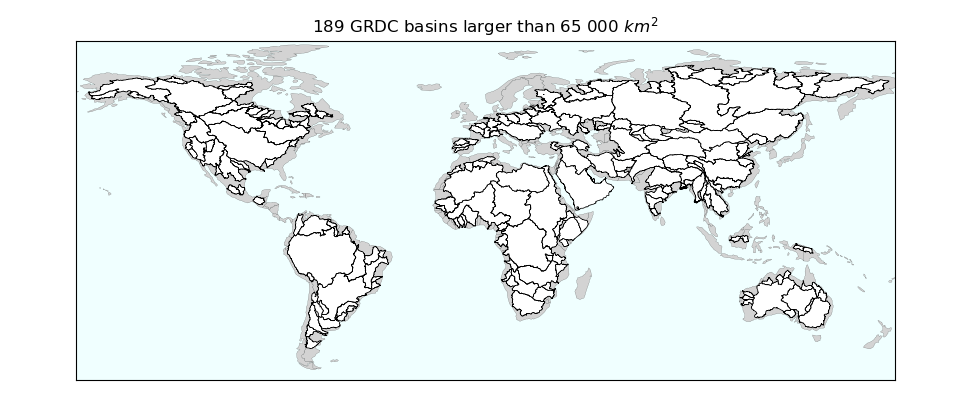

In [12]:
fig, ax = plt.subplots(figsize=(9.7,4))
ax.set_aspect('equal')
world.plot(ax=ax,color='lightgrey',edgecolor='black',linewidth=0.1)
new_basins.plot(ax=ax,color='white',edgecolor='black',linewidth=0.5)
ax.set_facecolor("azure")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-170,180])
ax.set_ylim([-60,85])
ax.set_title('{} GRDC basins larger than 65 000 $km^2$'.format(new_basins.shape[0]))
plt.tight_layout()
plt.show()

Save basins

In [13]:
new_basins.to_file('../datasets/basins/basins.shp')

# Decompose the Amazon basin into sub-basins

<div class="alert alert-block alert-info">
This has no influence on the water budget closure in the Amazon basin. The smallest water budget imbalance is found at the South in equatorial region.
</div>

In [14]:
amazon_region=additional_basins.loc[list(np.arange(302,309))+list(np.arange(319,326))]
amazon_river=additional_basins.loc[np.arange(309,319)].dissolve(by='RIVERBASIN')

In [15]:
amazon_details=amazon_region.loc[:,['SUBREGNAME','REGNAME','OCEAN','SUM_SUB_AR','geometry']]
amazon_details.columns=['NAME','CONTINENT','OCEAN','RASTAREA','geometry']
amazon_details.set_index(np.arange(amazon_details.shape[0]),inplace=True)
amazon_details['NAME']=amazon_details['NAME'].replace('ICA (also PUTUMAYO)','ICA')
amazon_details['NAME']=amazon_details['NAME'].replace('JAPURA (also CAQUETA)','JAPURA')
amazon_details['NAME']=amazon_details['NAME'].replace('JAVARI (also YAVARI)','JAVARI')
amazon_details['NAME']=amazon_details['NAME'].replace('JURUA (also YURUA)','JURUA')
amazon_details['NAME']=amazon_details['NAME'].replace('MADEIRA (also MADERA) (ex 316, 317)','MADEIRA')

In [16]:
amazon_details.loc[amazon_details.shape[0]+1]=['AMAZON RIVER','South America','Atlantic Ocean',
                                              additional_basins.loc[np.arange(309,319),'SUM_SUB_AR'].astype(float).sum(),
                                              amazon_river['geometry'].values[0]]
amazon_details

,NAME,CONTINENT,OCEAN,RASTAREA,geometry
0,UCAYALI and MARANON,South America,Atlantic Ocean,718583.2,"POLYGON ((-78.43750 -0.68333, -78.39527 -0.740..."
1,BENI,South America,Atlantic Ocean,282423.4,"POLYGON ((-65.39167 -10.37083, -65.39167 -10.4..."
2,MAMORE,South America,Atlantic Ocean,637415.5,"POLYGON ((-60.07083 -12.90000, -60.07500 -12.9..."
3,NEGRO (Amazon tributary),South America,Atlantic Ocean,714738.2,"POLYGON ((-59.32917 1.45833, -59.35000 1.45000..."
4,NAPO,South America,Atlantic Ocean,102646.2,"POLYGON ((-77.42500 0.78750, -77.41193 0.75908..."
5,ICA,South America,Atlantic Ocean,121117.5,"POLYGON ((-68.70000 -2.73750, -68.68679 -2.769..."
6,JAPURA,South America,Atlantic Ocean,270157.1,"POLYGON ((-73.17917 1.97500, -73.11962 1.94527..."
7,JAVARI,South America,Atlantic Ocean,109678.5,"POLYGON ((-69.75833 -4.37500, -69.78333 -4.408..."
8,JURUA,South America,Atlantic Ocean,189723.5,"POLYGON ((-66.94583 -5.42500, -66.97845 -5.442..."
9,PURUS,South America,Atlantic Ocean,378742.2,"POLYGON ((-61.24583 -3.93333, -61.27562 -3.955..."


<IPython.core.display.Javascript object>


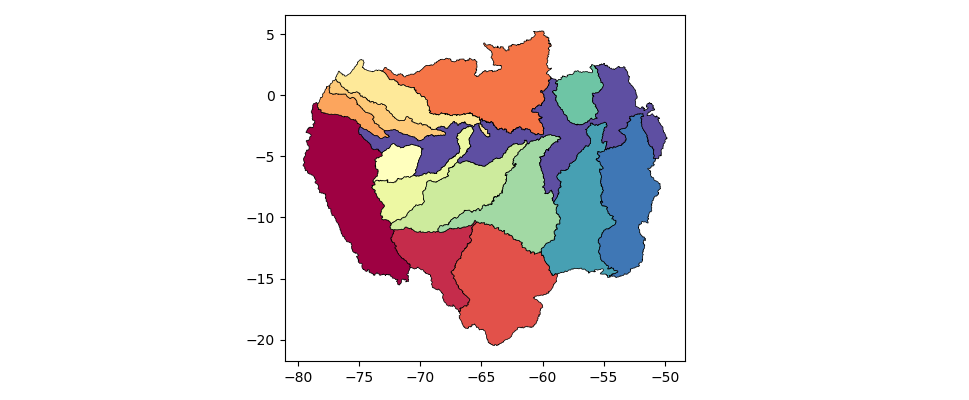

In [17]:
fig, ax = plt.subplots(figsize=(9.7,4))
ax.set_aspect('equal')
#amazon_region.plot(ax=ax,edgecolor='black',linewidth=0.5,cmap='Spectral')
#amazon_river.plot(ax=ax,edgecolor='black',linewidth=0.5,color='grey')
amazon_details.plot(ax=ax,edgecolor='black',linewidth=0.5,cmap='Spectral')
plt.tight_layout()
plt.show()

In [18]:
amazon_details.to_file('../datasets/basins/amazon_subbasins.shp')